   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


Saving archive.zip to archive.zip
['True.csv', 'Fake.csv']
Accuracy: 0.9946547884187082

 Confusion Matrix:
 [[4223   24]
 [  24 4709]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



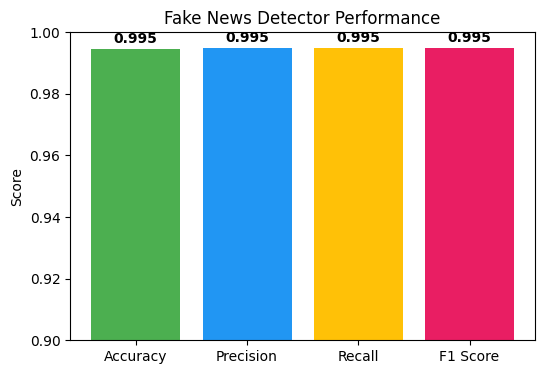

Textarea(value='', description='News:', layout=Layout(height='120px', width='600px'), placeholder='Paste news …

Button(button_style='info', description='Check Fake/Real', style=ButtonStyle())

Output()

In [1]:
!pip install scikit-learn pandas ipywidgets

import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
uploaded = files.upload()  # Upload archive.zip
# Extract zip
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Check extracted files
print(os.listdir("dataset"))
# Load datasets
df_fake = pd.read_csv("dataset/Fake.csv")
df_true = pd.read_csv("dataset/True.csv")

# Add labels
df_fake["label"] = 1  # Fake = 1
df_true["label"] = 0  # Real = 0

# Combine
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)
df = df[["text", "label"]]  # Keep only relevant columns

df.head()
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Accuracy & Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
# 📊 Plot Performance Metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = [accuracy, precision, recall, f1]
names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Plot
plt.figure(figsize=(6,4))
plt.bar(names, metrics, color=["#4CAF50", "#2196F3", "#FFC107", "#E91E63"])
plt.ylim(0.9, 1.0)
plt.title("Fake News Detector Performance")
plt.ylabel("Score")
for i, v in enumerate(metrics):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

def check_news(news_text):
    news_vec = vectorizer.transform([news_text])
    pred = model.predict(news_vec)[0]
    return "Real News" if pred == 0 else "Fake News"

# Create UI elements
text_box = widgets.Textarea(
    placeholder='Paste news article here...',
    description='News:',
    layout=widgets.Layout(width="600px", height="120px")
)
button = widgets.Button(description="Check Fake/Real", button_style='info')
output = widgets.Output()

# Define click action
def on_button_clicked(b):
    with output:
        output.clear_output()
        if text_box.value.strip() == "":
            print("⚠️ Please enter some text!")
        else:
            result = check_news(text_box.value)
            print("📰 Result:", result)

# Connect button to function
button.on_click(on_button_clicked)

# Display UI
display(text_box, button, output)